<a href="https://colab.research.google.com/github/SamurAIGPT/LlamaIndex-course/blob/main/indexes/Indexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index

An index in LlamaIndex is a data structure that organizes and stores information from various data sources, making it easier to search. An index is built over a bunch of nodes

### Node

Node is the fundamental unit of LlamaIndex. Node is nothing but a data structure which contains a piece of text.

Whenever you are provided a document, you can split into multiple chunks and store in nodes

### Types of Indexes

LlamaIndex offers different types of indices which we will be studying now

### List Index

The list index stores Nodes as a sequential chain like a linked list datastructure. By default it takes data from all nodes and sends it as part of the response

The list index does offer various ways of querying a list index, from an embedding-based query which will fetch the top-k nodes, or with the addition of a keyword filter

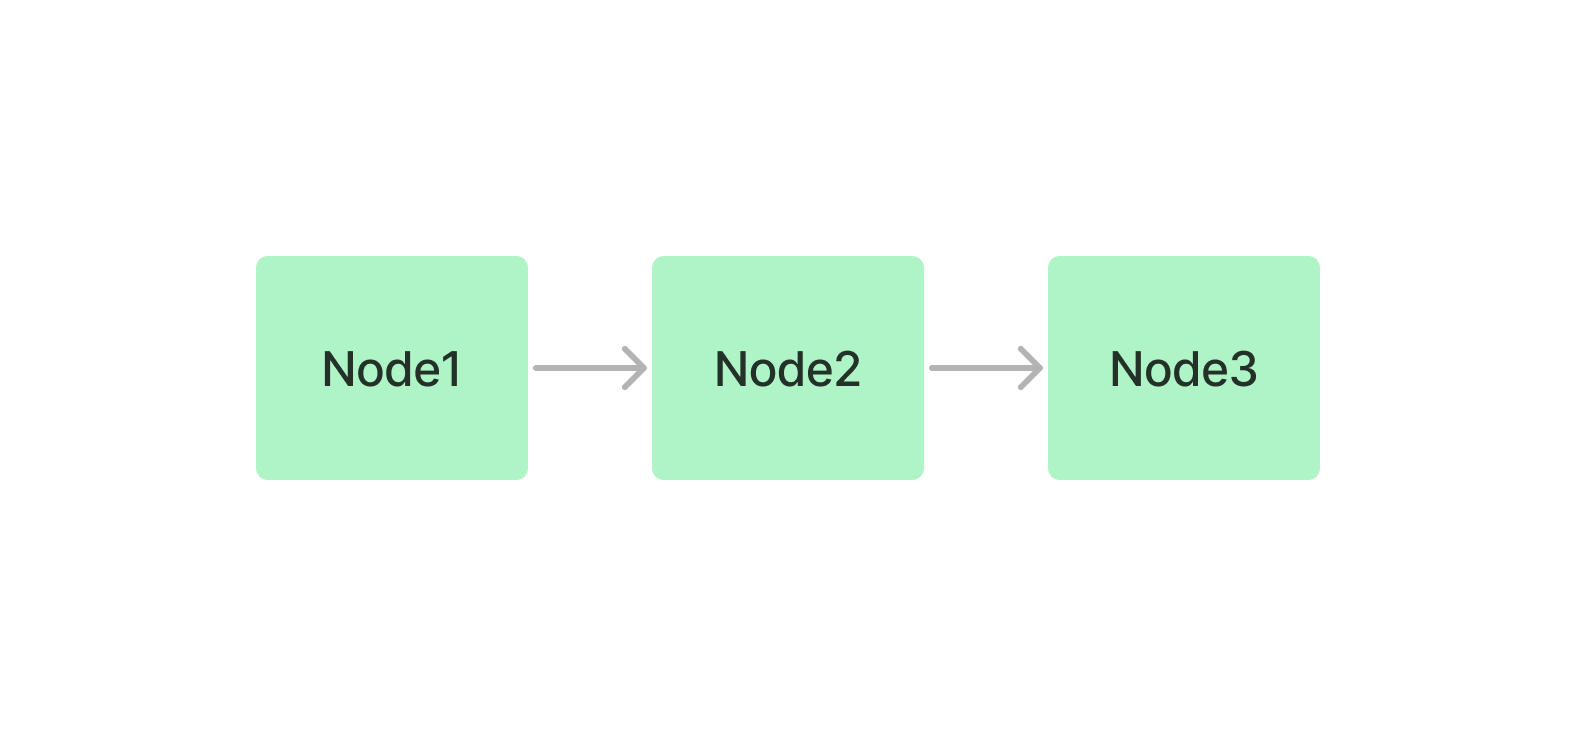

### Vector Store Index

The vector store index stores each Node and it's corresponding embedding in a Vector Store. While querying a vector index, it always gives you top-k most similar Nodes relevant to our query

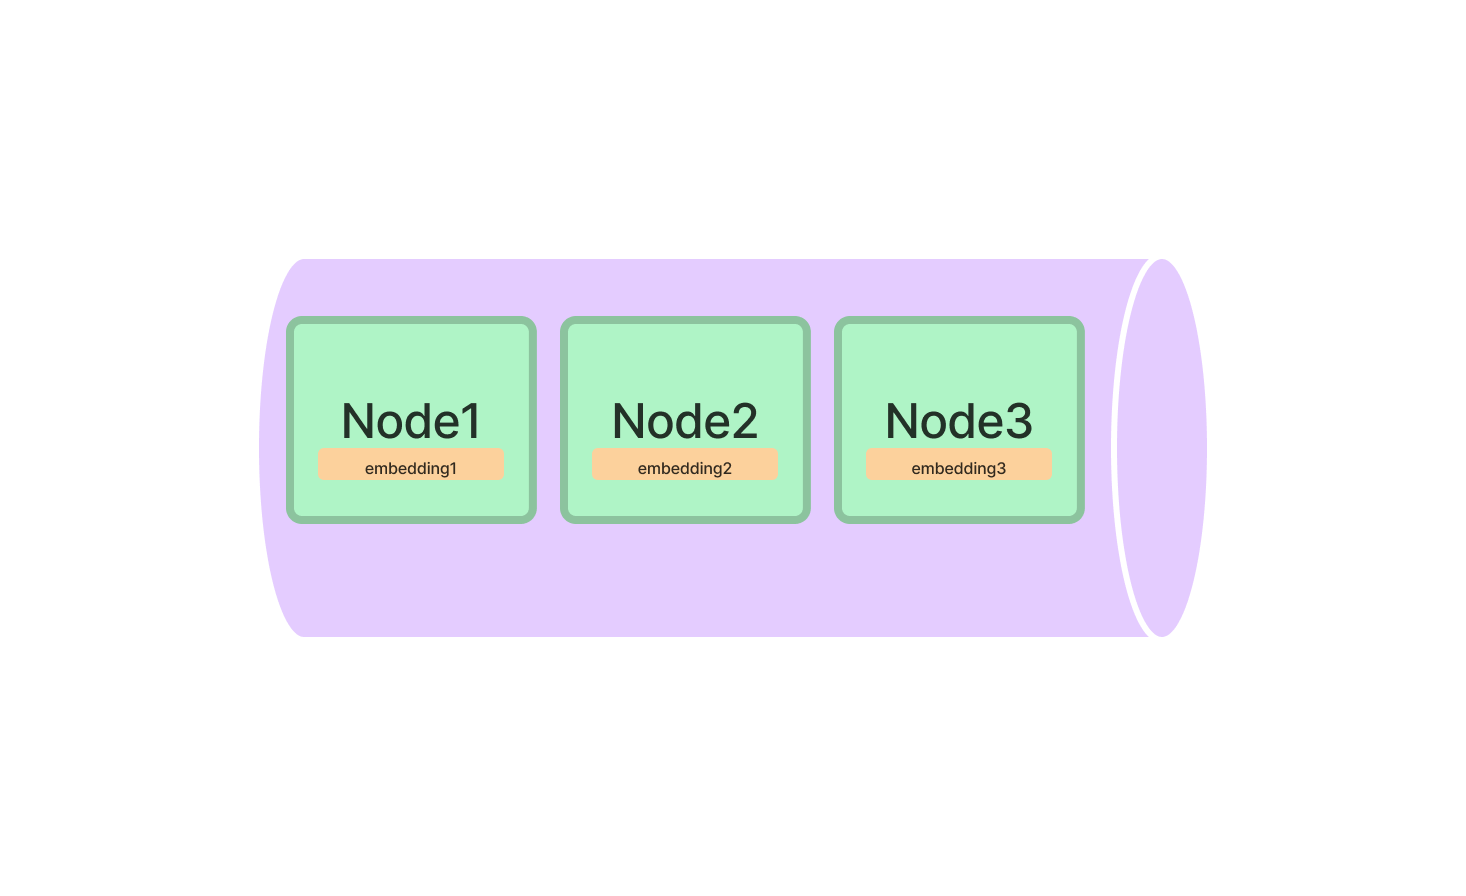

### Tree Index

The tree index builds a hierarchical tree from a set of Nodes.

Internally the tree is formed by summarization prompts. It takes in a list of text documents as input. It then builds up a tree index in a bottom-up fashion where each parent node is the summary of the nodes beneath it.

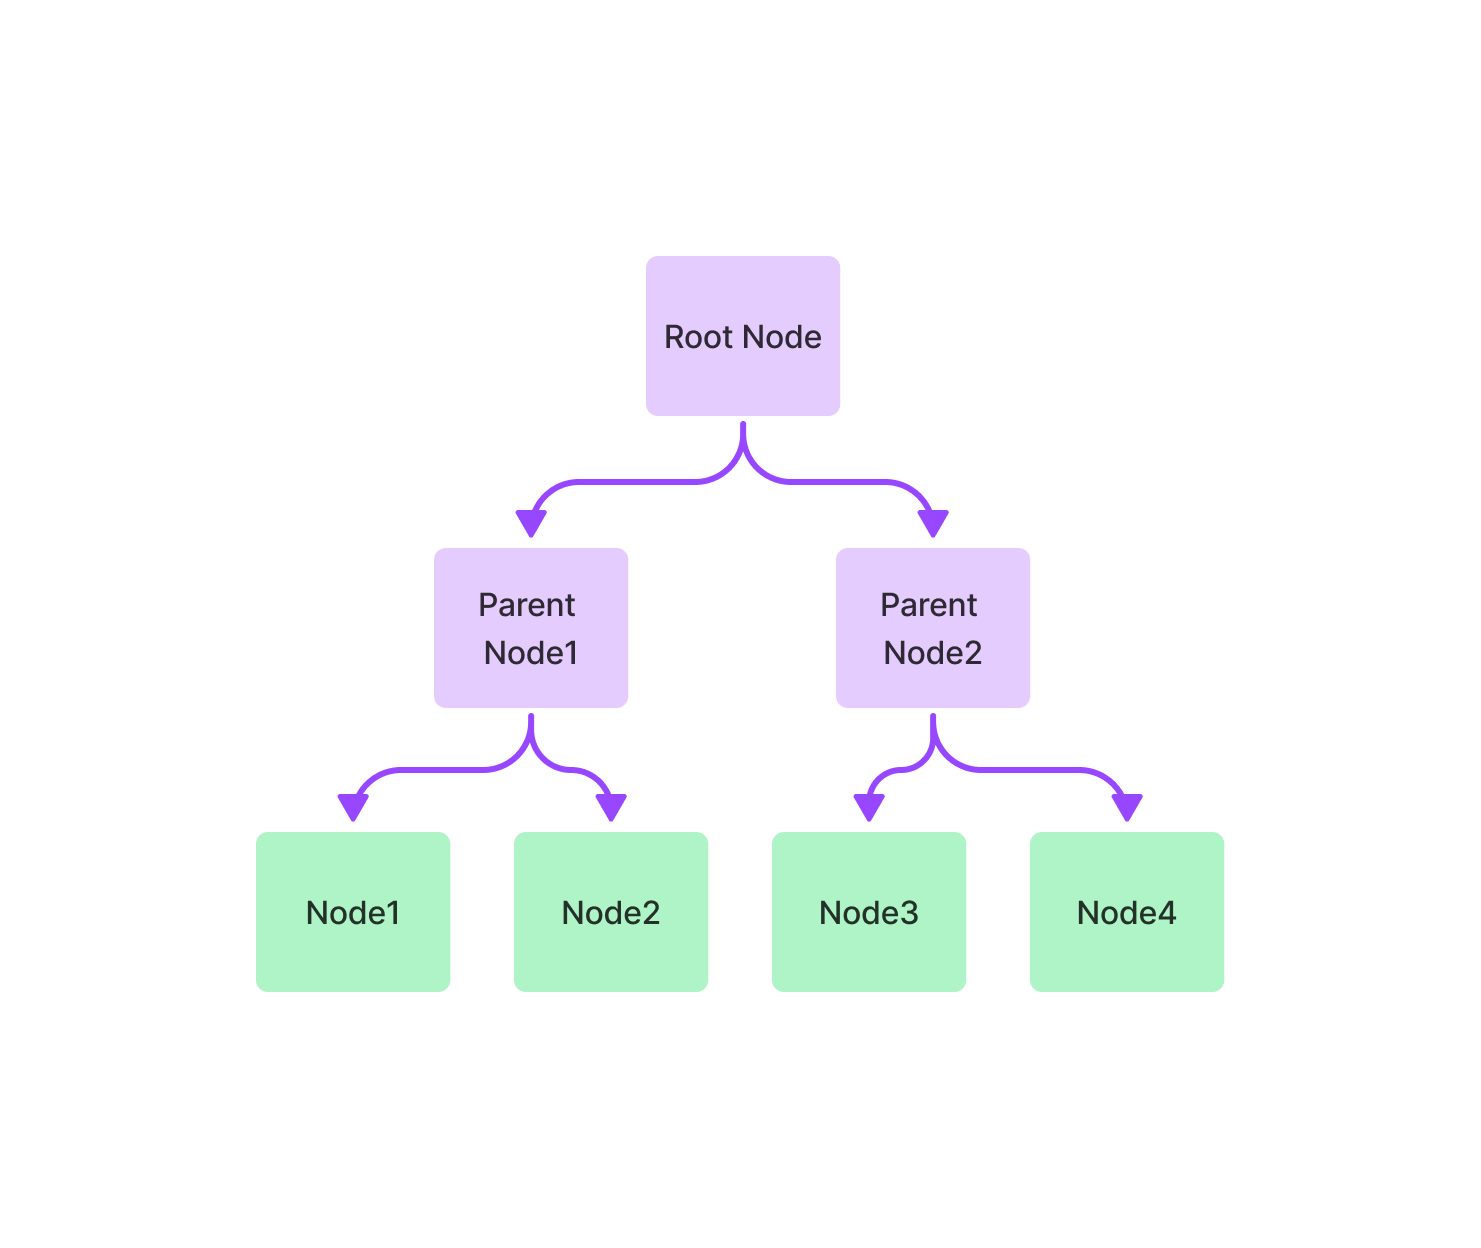


Querying a tree index involves going from root nodes down to leaf nodes. By default, (child_branch_factor=1), a query chooses one child node given a parent node. If child_branch_factor=2, a query chooses two child nodes per level.

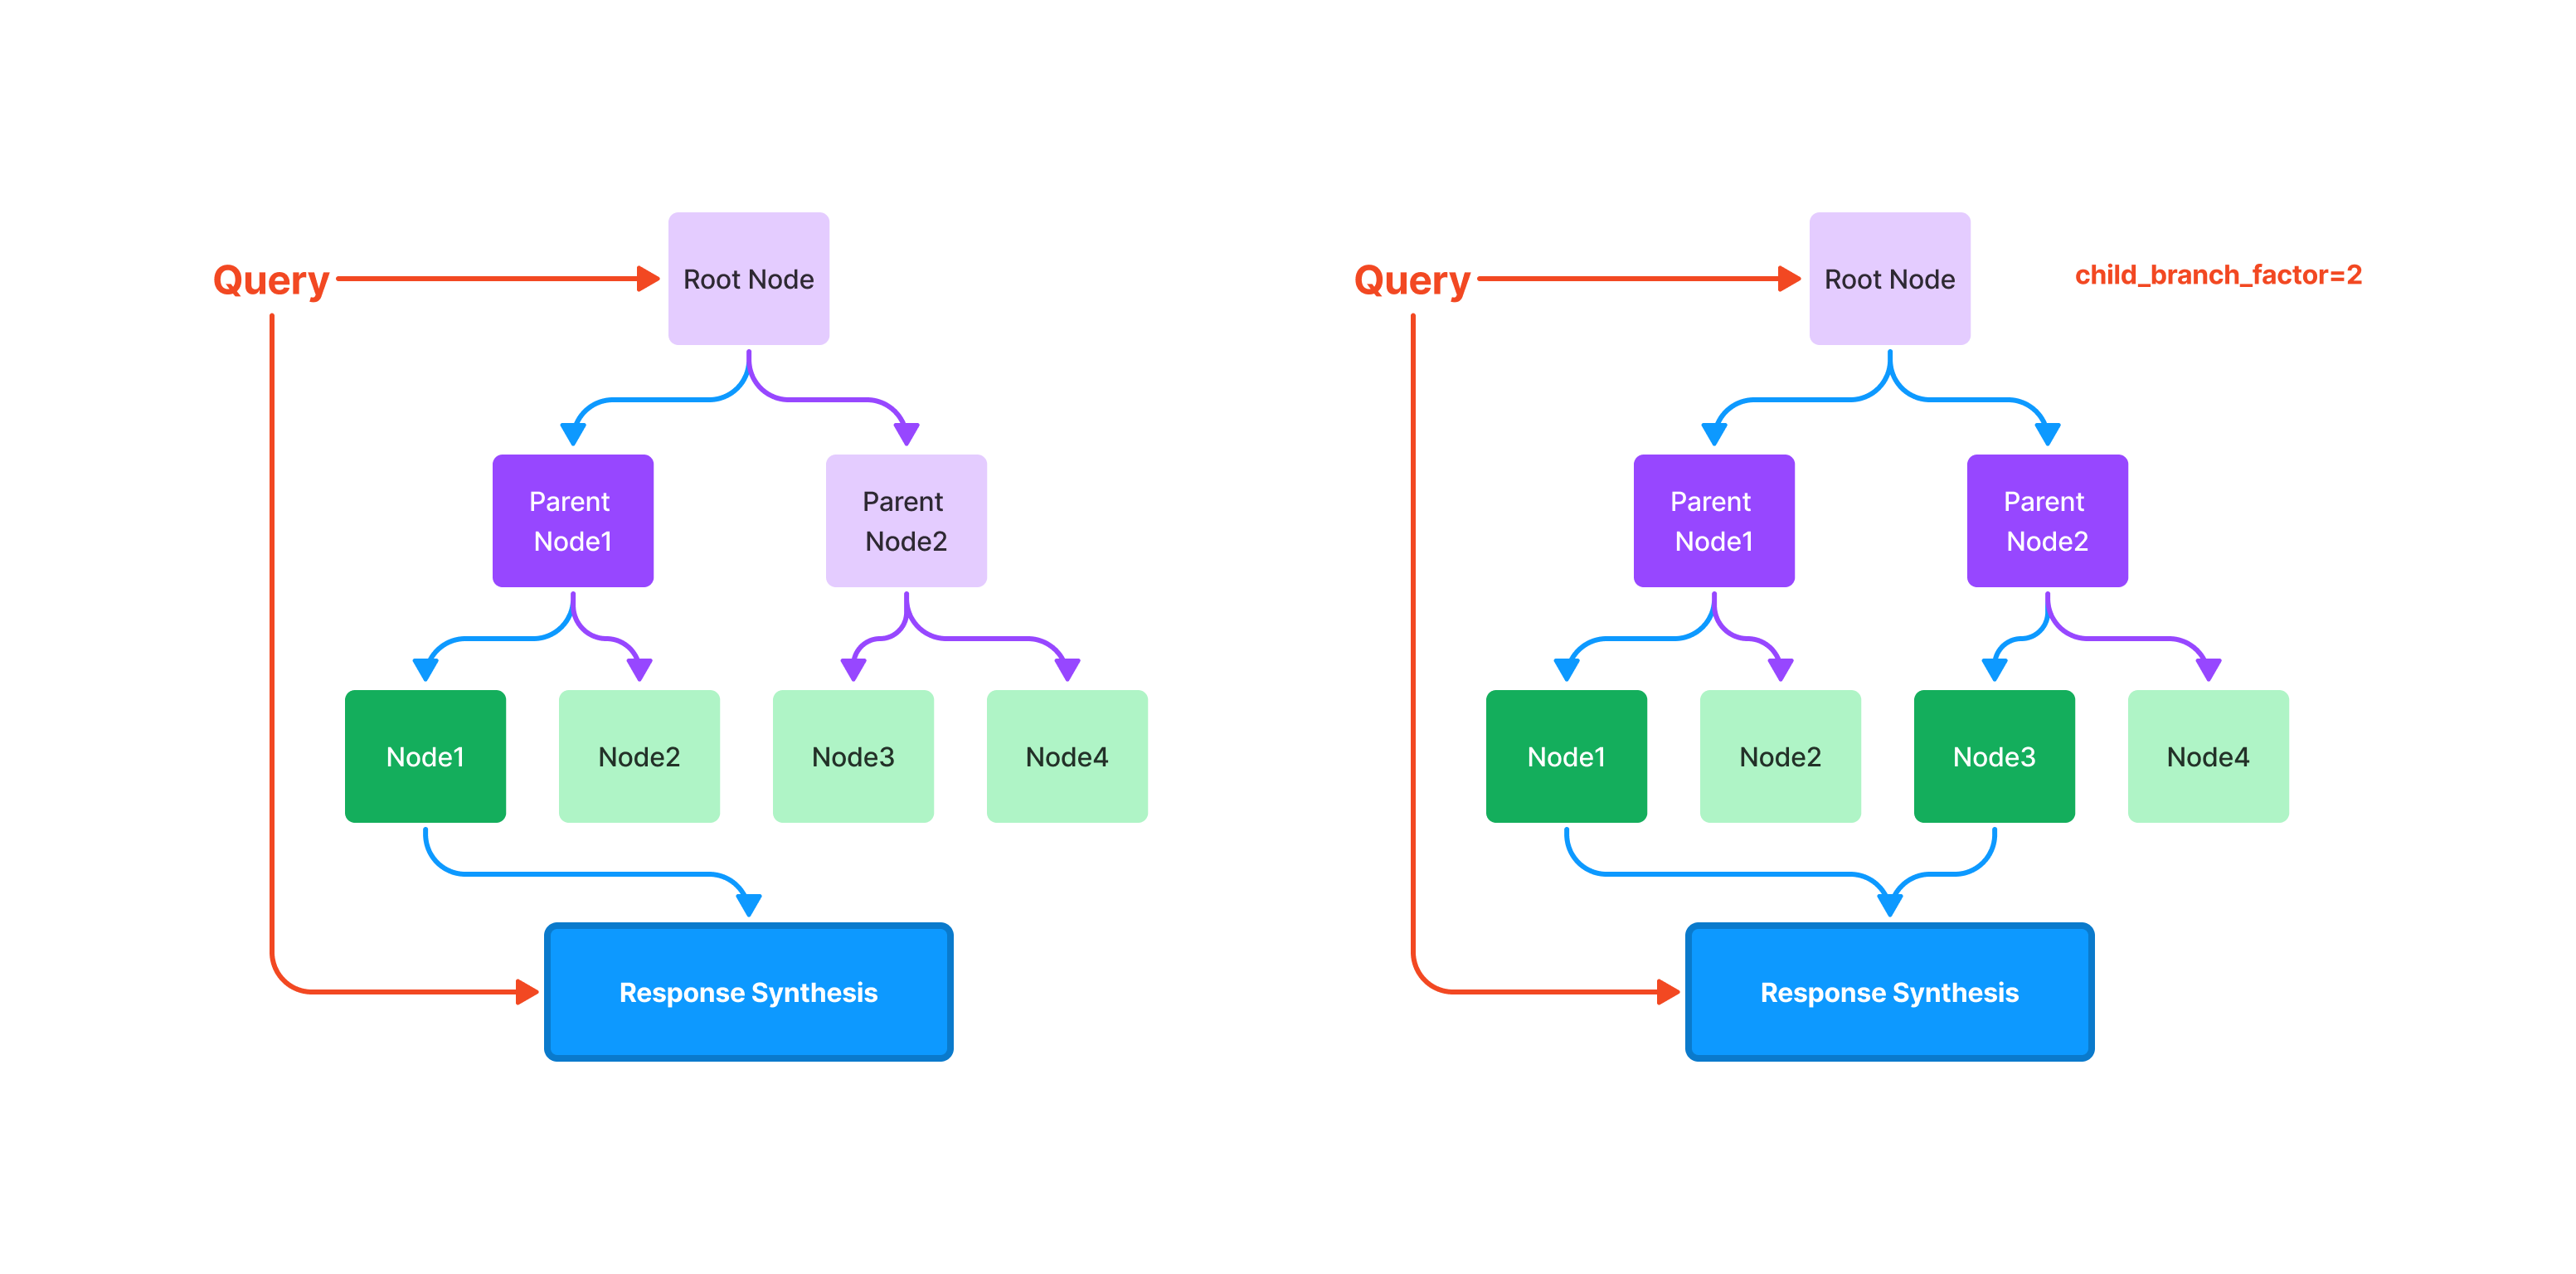

### Keyword Table Index

The GPTKeywordTableIndex implementation extracts the keywords from indexed nodes and uses them to find relevant documents. When we ask a question, first the implementation will generate keywords from the question. Next, the index searches for the relevant documents and sends them to the LLM.

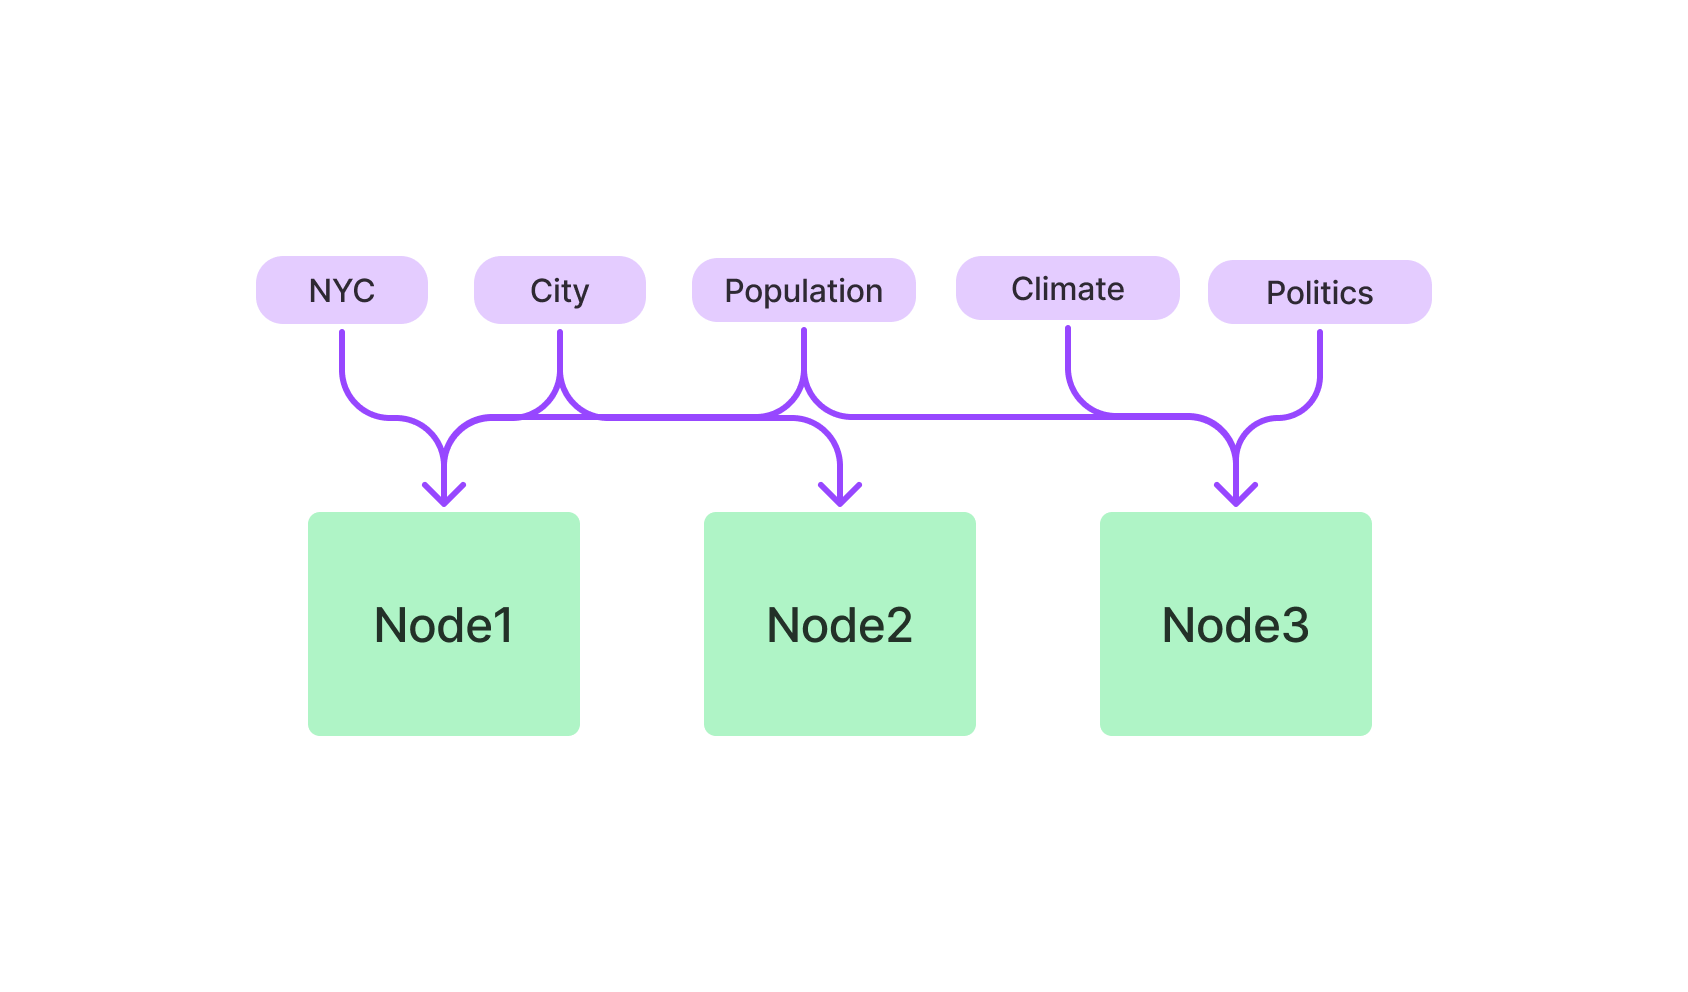


## When to use a particular index

### List Index

The ListIndex index is perfect when you don’t have many documents. Instead of trying to find the relevant data, the index concatenates all chunks and sends them all to the LLM. If the resulting text is too long, the index splits the text and asks LLM to refine the answer.

When used with 'embedding' parameter it is quite similar to VectorStoreIndex with the difference being list index sends all the matching nodes without any threshold while vectorstoreindex sends a node only if it matches a certain threshold

### Vector Index

The Vector Index can be used when we wish to fetch top-K relevant documents passing a certain threshold of matching score.

### Tree Index

A Tree index index is useful when dealing with summarization based tasks

### Keyword Table Index

In Keyword Table Index every node is sent to the LLM to generate keywords. Sending every document to an LLM skyrockets the cost of indexing. It’s slower and more expensive than the other indexes. Thus it's not preferred unless the results provided using this index is much better than others which is not necessarily the case